<!--# STAT 207: Data Science Exploration-->
## Missing Values, Quantitative Variables and Distributions

In this section we first consider how to clean missing values for preliminary analysis. Then we study a number of ways to summarize and visualize quantitative information in the data. Key ideas are:

+ **Missing value codes** non-standard missing value types in an external file can be specified as an option in the pandas read_csv function. Checking for missing values is important, both because of they can casue errors in computing, and because they can influence interpretation of results.

+ **Quantitative/numerical data** - variables that contain specific numerical information for each indvidual observation. In a pandas dta frame we expect an entire column to be either quantitative (numerical), qualitative (categories, several possible text values, similar to "multiple choice" answers) or logical (special type of categories: True or False).

+ **Histograms** and **density plots** are useful for capturing the distribution of the data, showing modes, relative frequencies and other features of the data in one graph.

+ **Summary statistics** such as **quantiles** of the data, **mean**, **median**, **mode**, etc capture certain features that are often of interest in their own right or for comparison across levels of another variable.

+ **Box plots** and **violin plots** provide quick views of key percentiles of a sample distributionm and are especially useful for comparing distributions of quantitative variables by levels of another categorical variable.

+ **Packages:** pandas, numpy, matplotlib.pyplot, seaborn

+ **Skills:** define our own functions to perform common tasks

### Pew Data Example: Checking for missing values

In the previous sections, we saw how to import Python packages that we need, and how to read an external data file into a python data frame. We also looked at some methods to get a sense of what type of information is in the data, and did simple frequency summaries and crosstabs for categorical variables in the data.

In this section we consider quantitative variables and consider some methods for investigating the distributions of the variables as well as relations between them. We consider the Pew Research Center data again, and reimport them to make this section's notebook self contained. 


In [1]:
import pandas as pd     # 'pd' is our nickname for 'pandas'
import zipfile as zp    # skip if file not compressed

In [2]:
# Next step is only for zip compressed files
zf = zp.ZipFile('../data/Feb17-public.zip')

In [3]:
# Next step pulls csv file from the zip file object
df = pd.read_csv(zf.open('Feb17public.csv'))   
#
# If instead we had an ordinary csv file in the same folder 
# as this notebook we would read it more simply using:
#
# df = pd.read_csv('Feb17public.csv')
#
# Display the first part of the data frame:
df.head()

,psraid,sample,int_date,fcall,version,attempts,refusal,ilang,cregion,state,...,ql1a,qc1,money2,money3,iphoneuse,hphoneuse,ll,cp,cellweight,weight
0,100008,Landline,21017,170207,Client changes,4,No,English,Midwest,Illinois,...,NaN,NaN,NaN,NaN,Dual,Dual HH,1,1,NaN,1.733333
1,100019,Landline,21217,170207,Client changes,4,Yes,English,South,North Carolina,...,NaN,NaN,NaN,NaN,Dual,Dual HH,1,1,NaN,1.500000
2,100020,Landline,21217,170207,Client changes,4,Yes,English,Northeast,New York,...,NaN,NaN,NaN,NaN,Dual,Dual HH,1,1,NaN,1.533333
3,100021,Landline,20717,170207,Initial version,1,No,English,Midwest,Minnesota,...,NaN,NaN,NaN,NaN,Dual,Dual HH,1,1,NaN,5.866667
4,100024,Landline,20717,170207,Initial version,1,No,English,Midwest,Illinois,...,NaN,NaN,NaN,NaN,Dual,Dual HH,1,1,NaN,1.700000


Here, again, is the list of columns in the data frame;

In [4]:
print(df.columns.values)

['psraid' 'sample' 'int_date' 'fcall' 'version' 'attempts' 'refusal'
 'ilang' 'cregion' 'state' 'density' 'sstate' 'form' 'stimes' 'igender'
 'irace' 'llitext0' 'susr' 'usr' 'scregion' 'qs1' 'q1' 'q1a' 'q2' 'q5af1'
 'q5bf1' 'q5cf1' 'q5df1' 'q6af2' 'q6bf2' 'q6cf2' 'q6df2' 'q10a' 'q10b'
 'q15af1' 'q15b' 'q15cf2' 'q15df1' 'q15ef1' 'q15ff1' 'q15gf2' 'q15hf2'
 'q15if2' 'q16' 'q19' 'q35' 'q36' 'q37' 'q39' 'q43' 'q44' 'q45' 'q45vb'
 'Q45VB0' 'Q45VB1' 'Q45VB2' 'q45oem1' 'q45oem2' 'q45oem3' 'q52' 'q53'
 'q54' 'q55' 'q61a' 'q61b' 'q61c' 'q61d' 'q61e' 'q62f1' 'q63f1' 'q64f2'
 'q65' 'q66' 'q68f1' 'q69f2' 'q70f1' 'q71f2' 'q74' 'q75' 'q81' 'q82'
 'q84a' 'q84bf1' 'q84cf1' 'q84df1' 'q84ef2' 'q84ff2' 'q84gf2' 'q88'
 'q90f1' 'q91f2' 'sex' 'age' 'gen5' 'educ2' 'hisp' 'adults' 'racethn'
 'racethn2' 'birth_hisp' 'citizen' 'child' 'relig' 'chr' 'born' 'attend'
 'q92' 'q92a' 'income' 'reg' 'party' 'partyln' 'partysum' 'partyideo'
 'q93' 'q94' 'ideo' 'hh1' 'hh3' 'ql1' 'ql1a' 'qc1' 'money2' 'money3'
 'iphoneus



Let's investigate the age distribution in the sample. First, we check if there are any weird values.

In [5]:
df['age'].unique()

array(['80', '70', '69', '50', '78', '89', '92', '54', '58', '38', '76',
       '65', '63', '33', '37', '49', '71', '67', '75', '60', '26', '84',
       '64', '57', '59', '74', '55', '96', '61',
       "Don't know/Refused (VOL.)", '83', '53', '81', '36', '51', '29',
       '86', '44', '48', '35', '66', '68', '24', '20', '95', '56', '47',
       '82', '85', '73', '40', '62', '52', '72', '91', '45', '39', '77',
       '90', '18', '46', '88', '32', '94', '43', '27', '42', '34', '28',
       '79', '30', '19', '31', '21', '25', '23', '22', '41', '87'],
      dtype=object)

Oops, there are two problems here!

1. There is a type of **missing value**: the text entries, "Don't know/Refused (VOL.)". Our numerical functions might choke on this;

2. Because of the text entries, the entire column was read as character data rather than numerical data. 

It is possible that the "missingness" here is informative in the sense that the likelihood of refusing to reveal ones age might be related to one's age. That could ultimately affect the analysis.

Setting that issue aside for now, though, we can "clean" the data by adding "Don't know/Refused (VOL.)" to the list of missing values and re-read the data. Here is the Python code and the results:

In [6]:
missing_values = ["NaN", "nan", "Don't know/Refused (VOL.)"]
df = pd.read_csv(zf.open('Feb17public.csv'), na_values=missing_values)
df['age'].unique()

array([80., 70., 69., 50., 78., 89., 92., 54., 58., 38., 76., 65., 63.,
       33., 37., 49., 71., 67., 75., 60., 26., 84., 64., 57., 59., 74.,
       55., 96., 61., nan, 83., 53., 81., 36., 51., 29., 86., 44., 48.,
       35., 66., 68., 24., 20., 95., 56., 47., 82., 85., 73., 40., 62.,
       52., 72., 91., 45., 39., 77., 90., 18., 46., 88., 32., 94., 43.,
       27., 42., 34., 28., 79., 30., 19., 31., 21., 25., 23., 22., 41.,
       87.])

The missing value is now properly coded for our purposes, and, importantly, 'age' is now a numerical variable rather than a text variable (numbers like 80., 70., ... not character strings like '80', '70', ...) 

### Distributions of quantitative variables: histogram and density curve

Let's plot a **frequency histogram** for age in the Pew survey using the matpotlib.pyplot **hist()** function. To do so we first import the relevant plotting packages. Also, because of the missing values, we might need to explicitly drop these for plotting purposes. The **.dropna( )** function accomplishes this task as in the following example. Many pandas functions automatically drop missing values by default, as we will see.

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

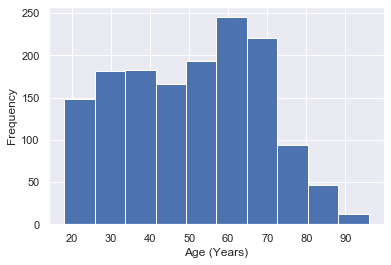

In [8]:
# pandas function for histograms
df['age'].dropna().hist()
#df['age'].hist()
plt.xlabel("Age (Years)")
plt.ylabel("Frequency")
plt.show()

In this graph the age range is divided into equal width bins, and the height of the bar is the number of observations with age values in each bin. The total area under this curve should be the total sample size. We can see the data have a mode around 60 years, and a minimum just under age 20.

Often we will want the **density histogram** instead. In this plot the **area** of each bar represents the **proportion** of the sample in that bin. In the current version of matplotlib we specify the option **density=True** to get the density histogram.


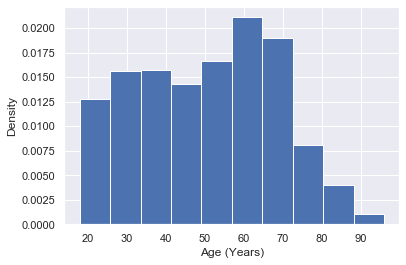

In [9]:
# option for density histrgram where area under the curve = 1
df['age'].dropna().hist(density=True)
plt.xlabel("Age (Years)")
plt.ylabel("Density")
plt.show()

The shape of the density histrogram looks the same as the frequency histogram, but it has been normalize to make the total area under the histogram equal 1.

An alterative graph, using seaborn, includes both the **density histogram** and a smooth fitted **density curve** using the seaborn **distplot( )** function. The smooth density curve is another way to represent the distribution of the data, smoothing out some of the random jaggedness due to binning the data in the density histogram.

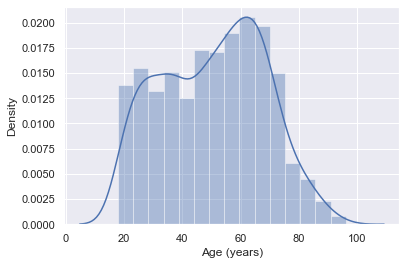

In [10]:
# using seaborn function for histograms and density curves
sns.distplot(df['age'].dropna())
plt.ylabel('Density')
plt.xlabel("Age (years)")
plt.show()

What determines the vertical scale for the **density histogram** and the superimposed **smooth density curve**? Each of these graphs represents the **relative frequency** (i.e. the proportion) of values in different age ranges as the area under the curve for those ranges. So, the total area for the whole range must =1. 

If we wanted the proportion of ages in the sample between 40 and 60, we would take either the sum of the areas of the histogram bars for that range (area = base width * height), or, for the density curve, some approximation to the area between 40 and 60. In other words, we need the area between the vertical lines and under the curve in the figure below.

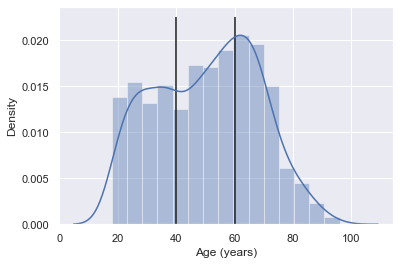

In [11]:
sns.distplot(df['age'].dropna())
plt.ylabel('Density')
plt.xlabel("Age (years)")
plt.vlines(x=[40,60], ymin=0, ymax=0.0225)
plt.show()

From the curve we can immediately see that minimum age in the sample is just under 20. In fact, we know that the survey callers requested to speak to a member of the household over the age of 18. To verify the actual minimum age in the sample we compute it using the **min** function.

In [12]:
print("Minimum age =", df['age'].min())

Minimum age = 18.0


### Summary Statistics for Pandas Data Frames

What are some other summary statistics we might want to compute? Here are a few:

In [13]:
print("Median =", df['age'].median())
print("Mean = ", df['age'].mean())
print("Standard Deviation =  ", df['age'].std())
print("First quartile (Q1) =", df['age'].quantile(q=0.25))
print("Third quartile (Q3) =", df['age'].quantile(q=0.75))
print("Maximum =", df['age'].max())

Median = 52.0
Mean =  50.48824714573539
Standard Deviation =   17.843970630239685
First quartile (Q1) = 35.0
Third quartile (Q3) = 65.0
Maximum = 96.0


That took a lot of typing. We can simplify this by copying the variable of interest into a pandas Series, say 'x'.

In [14]:
x = df['age'] 
print("Median =", x.median())
print("Mean = ", x.mean())
print("Standard Deviation =  ", x.std())
print("First quartile (Q1) =", x.quantile(q=0.25))
print("Third quartile (Q3) =", x.quantile(q=0.75))
print("Maximum =", x.max())

Median = 52.0
Mean =  50.48824714573539
Standard Deviation =   17.843970630239685
First quartile (Q1) = 35.0
Third quartile (Q3) = 65.0
Maximum = 96.0


### Defining our own function

What if we wanted to compute these summary statistics for a bunch of variables, or for differnt data sets? Python allows us to create our own functions to do general tasks. The benfit is we don't have to recode every time. Just reuse the function. Let's make a function to compute the summary statistics listed above. The structure is as follows.

    def function_name (arguments):
        statements
        return value
        
In python, the indentation of the statements and return lines must be 4 characters. Jupyter notebooks do this indenting automatically as you compose.

In our case, let's have our function put the summary statistics into a data frame for display purposes.

In [15]:
def mysummary(series):
    index = ['min', 'Q1', 'med', 'Q3', 'max', 'mean', 'std']
    value = [series.min(), 
             series.quantile(q=0.25), 
             series.median(), 
             series.quantile(q=0.75),
             series.max(),
             series.mean(),
             series.std()]
    return pd.DataFrame({'value': value}, index=index)

Now that we've defined it we can use it for any quantitative variable.

In [16]:
mysummary(df['age'])

,value
min,18.000000
Q1,35.000000
med,52.000000
Q3,65.000000
max,96.000000
mean,50.488247
std,17.843971


What if we wanted the summary statistics for age for cell phone and landline users separately?

In [17]:
mysummary(df['age'][df['sample']=='Cell'])

,value
min,18.000000
Q1,32.000000
med,47.000000
Q3,60.000000
max,90.000000
mean,46.629364
std,16.884983


In [18]:
mysummary(df['age'][df['sample']=='Landline'])

,value
min,18.000000
Q1,54.000000
med,64.000000
Q3,72.000000
max,96.000000
mean,62.075269
std,15.491750


#### Extracting a subset of the results

What if we wanted to extract Q1 from the summary? Using the **.loc** function, we can refer directly to the rown **name** in the data frame of results. This differs from the **.iloc function**, which refers to the row and column **number**. Specifying .value causes python to show only the value of the object, suppressing the display of the object type.

In [19]:
results = mysummary(df['age'][df['sample']=='Landline'])
results.loc['Q3'].value

72.0

The **interquartile range** is a measure of spread defined as Q3 - Q1, i.e. the difference between the 75th percentile and the 25th percentile. In other words, it is the range of the middle half of the data. Let's compute it from our summary.

In [20]:
print('IQR = ', results.loc['Q3'].value - results.loc['Q1'].value)

IQR =  18.0


### Boxplots for quantitative variables - single group

Several of these types of summary statistics can be visualized using the **boxplot**, which typically includes the median, Q1, Q3 and thresholds for extreme values.

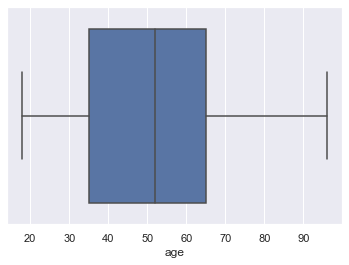

In [21]:
sns.boxplot(df['age'])
plt.show()


**Features of the box plot:**

+ The central line shows the **median** = 50th percentile (splits the data in half)
+ The central box goes from Q1 = 25th percentile to Q3 = 75th percentile
+ The width of the box is the **interquartile range (IQR)** = Q3 - Q1
+ The low and high bars ("whiskers") are by default 1.5 * IQR below Q1 and above Q3, meant to be thresholds for flagging possible outliers
+ If the minimum is above Q1 - 1.5 * IQR the whisker = the minimum
+ If the maximum is bleow Q3 + 1.5 * IQR the whisker = the maximum



### Boxplots and Violin plots - comparing quantiative variables across categories

A single boxplot like this tells us where the major percentiles are, and possibly flag outlier observations, but is not as informative as the density plot. However, boxplots can be very useful for *comparing* different subgroups. 

For example, let's compare the age distributions for respondents in the sample answering cell phones versus landline phones in the survey. Recall that the 'sample' variable stored whether the respondant used landline or cell phone. 

In [22]:
# contents of the 'sample' column of the data:
df['sample'].value_counts()

Cell        1126
Landline     377
Name: sample, dtype: int64

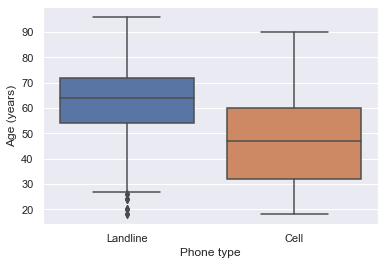

In [23]:
# seaborn's boxplot function. 
# Specify which data frame using the 'data=' argument.
sns.boxplot(x='sample', y='age', data=df)
plt.xlabel("Phone type")
plt.ylabel("Age (years)")
plt.show()

The **violin plot** is an alternative to the boxplot that includes representations of the data density within each group, in addition to an embedded box plot. Because it conveys more information, it has gained in popularity in recent year versus the boxplot.

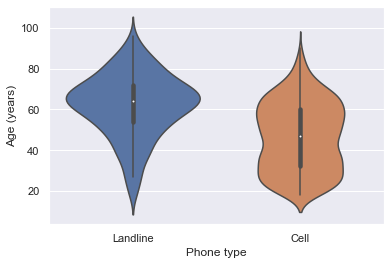

In [24]:
sns.violinplot(x='sample', y='age', data=df)
plt.xlabel("Phone type")
plt.ylabel("Age (years)")
plt.show()

How does this compare with your intuition? This is an example of how to visualize the relationship between a **quantitative** variable (age) and a **qualitative** variable (phone type).

## Discussion points

1. The density curve for the sample shows a **mode** (maximum density value) around 60 years of age, and there appear to be more people ages 50-70 than aged 20-40. Does this mean that the modal age in the U.S. population is 60 years, or that in the U.S. population there are more people aged 50-70 than 20-40? Why or why not? Recall that this was a random phone number dialing survey. What other sources could we check to find age distribution in the U.S.?

2. What is the difference between a barplot and a histogram?

---
STAT 207, Douglas Simpson, University of Illinois at Urbana-Champaign